In [51]:
%matplotlib inline
%pylab inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix

from inforet_package.preprocessing import *
from inforet_package.ensembler import *
from inforet_package.plotting import *

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#loading data
df = pd.read_csv("../data/train.csv")
print("{} rows loaded...".format(df.shape[0]))
df = df.sample(frac=0.05)
print("{} rows sampled...".format(df.shape[0]))

1306122 rows loaded...
65306 rows sampled...


In [3]:
questions = cleaning_questions(df)
tfidf_vocab, TfIdfMatrix, idf_dict = idf_dictionary_builder(questions)
cleaned_questions = clean_stopwords(questions, idf_dict, 4)

In [4]:
print(df.shape)
df['double'] = df['question_text'].progress_apply(lambda x: sentiment_pattern(x))
df['polarity'] = [d[0] for d in tqdm(df.double)]
df['subjectivity'] = [d[1] for d in tqdm(df.double)]
df = df.drop('double', 1)


df['cleaned_questions'] = cleaned_questions

insincere_df = df[df['target'] == 1]
vocab_dictionary = build_dictionary(df['cleaned_questions'])
insincere_vocab_dictionary = build_dictionary(insincere_df['cleaned_questions'])

spec_dict = get_specificity(vocab_dictionary, insincere_vocab_dictionary)
df['specificity_average'] = df['cleaned_questions'].progress_apply(lambda x: specificity_average(x, spec_dict))


X_sentiment = np.array(df[['specificity_average', 'polarity', 'subjectivity']].values)

(65306, 3)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_sentiment, df['target'], test_size=0.3)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Normalized confusion matrix
Precision: 0.3148614609571788
Recall: 0.30838815789473684
F1 score: 0.3115911923556294


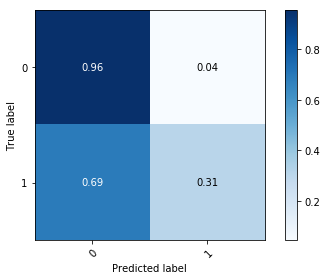

In [67]:
norm_ax, cm = plot_confusion_matrix(y_test, y_pred, [0,1],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)

print_performances(cm)